# Simple Example of calculating Stark maps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pairinteraction.backend.double as pi

In [2]:
pi.initialize_global_database(download_missing=True)

[2024-12-12 13:37:33.054 761556] [info] [Database.cpp:200] Accessing database repository path: /repos/pairinteraction/database-sqdt/releases/latest
[2024-12-12 13:37:33.240 761556] [info] [Database.cpp:235] Using cached overview of available tables.
[2024-12-12 13:37:33.240 761556] [info] [Database.cpp:200] Accessing database repository path: /repos/pairinteraction/database-mqdt/releases/latest
[2024-12-12 13:37:33.240 761556] [info] [Database.cpp:235] Using cached overview of available tables.
[2024-12-12 13:37:33.452 761556] [info] [Database.cpp:291] Availability of database tables for species and Wigner 3j symbols:
[2024-12-12 13:37:33.452 761556] [info] [Database.cpp:293] * Sr88_mqdt (locally available: false, up to date: false, fully downloaded: false)
[2024-12-12 13:37:33.452 761556] [info] [Database.cpp:293] * Yb171_mqdt (locally available: true, up to date: true, fully downloaded: false)
[2024-12-12 13:37:33.452 761556] [info] [Database.cpp:293] * Sr88_triplet (locally availabl

In [3]:
ket = pi.KetAtom("Rb", n=60, l=0, m=0.5)
basis = pi.BasisAtom("Rb", n=(56, 64), l=(0, 3))
print(f"Number of single-atom basis states: {basis.number_of_states}")
system = pi.SystemAtom(basis)

pair_energy = 2 * ket.get_energy(unit="GHz")
min_energy, max_energy = pair_energy - 10, pair_energy + 10

combined_basis = pi.BasisCombined([system, system], energy=(min_energy, max_energy), energy_unit="GHz", m=(1, 1))
print(f"Number of two-atom basis states: {combined_basis.number_of_states}")

distances = np.linspace(1, 4, 100)
combined_systems = [pi.SystemCombined(combined_basis).set_distance(d, unit="micrometer") for d in distances]

# Diagonalize the systems in parallel
pi.diagonalize(combined_systems, diagonalizer="Eigen", sort_by_energy=True)

eigenvalues = np.array([system.get_eigenvalues(unit="GHz") for system in combined_systems])
overlaps = np.array([system.get_eigenbasis().get_overlaps_with_product_state(ket, ket) for system in combined_systems])

Number of single-atom basis states: 288
Number of two-atom basis states: 547


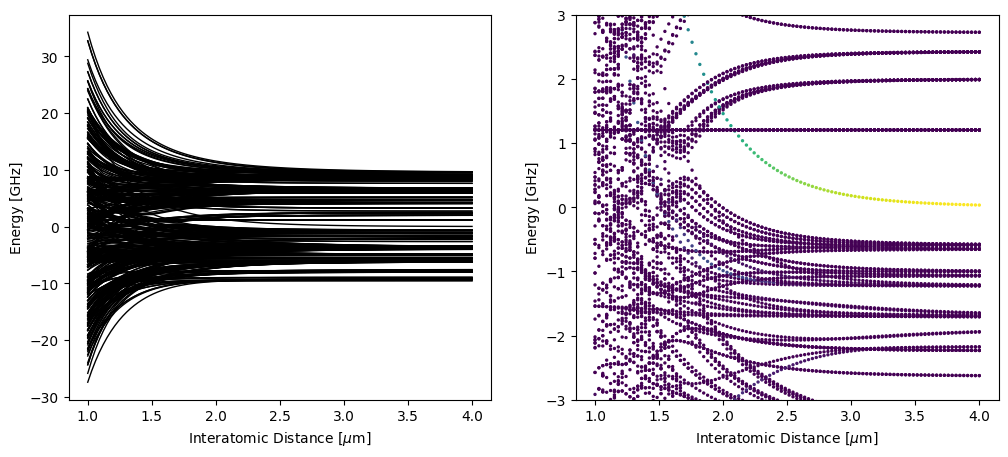

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax in axs:
    ax.set_xlabel(r"Interatomic Distance [$\mu$m]")
    ax.set_ylabel("Energy [GHz]")

axs[0].plot(distances, eigenvalues - pair_energy, c="k", lw=1)

axs[1].scatter(np.repeat(distances, eigenvalues.shape[1]), eigenvalues - pair_energy, c=overlaps, s=2)
axs[1].set_ylim(-3, 3)

plt.show()